# Module CSV

### Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values. 

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format. 

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases. 

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values. 

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



**csv module** provides functions for working with CSV files

In [ ]:
#Writing to a CSV file

#import csv module
import csv

#open file and write records
with open("accounts.csv", 'w')  as accounts:
  writer = csv.writer(accounts)
  writer.writerow([100, 'Jones', 24.98])
  writer.writerow([200, 'Doe', 345.67])
  writer.writerow([300, 'Williams', 0.00])
  writer.writerow([400, 'Stone', -42.16])
  writer.writerow([500, 'Rich', 224.62])


In [ ]:
#reading from CSV file
#The csv module’s reader function returns an object that reads CSV-format data from the specified file object

#open file and read records
import csv

#open file and write records
with open("accounts.csv", 'r')  as accounts:
  reader = csv.reader(accounts)
  print(f'{"Accounts":10}{"Name":10}{"Balance":8}')
  for record in reader:
    accountid, name, balance = record
    #print(record)
    #print(accountid, name, balance)
    print(f'{accountid:10}{name:10}{balance:8}')


Accounts  Name      Balance 
100       Jones     24.98   
200       Doe       345.67  
300       Williams  0.0     
400       Stone     -42.16  
500       Rich      224.62  


## Working with large CSV file

In [ ]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1672358400&period2=1680134400&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4376  100  4376    0     0  41676      0 --:--:-- --:--:-- --:--:-- 41676


In [ ]:
# !curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1653004800&period2=1661040000&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4531  100  4531    0     0  26652      0 --:--:-- --:--:-- --:--:-- 26810


In [ ]:
import csv

#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader))


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2022-12-30', '46.040001', '46.200001', '45.630001', '45.630001', '44.323624', '4860668']
['2023-01-03', '46.099998', '46.099998', '44.930000', '45.330002', '44.032215', '4480991']


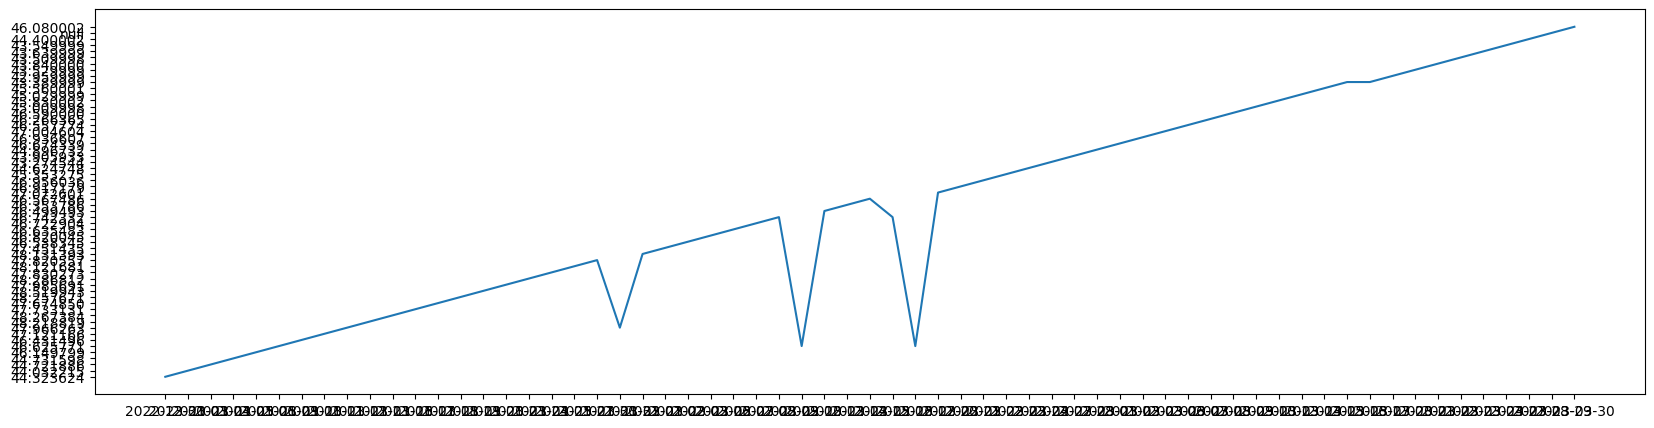

In [ ]:
import csv

date = []
close = []
c = 0
#open file and write records
with open("BHPData.csv", 'r')  as data:
  reader = csv.reader(data)
  header = next(reader, None) #get the headers
  #print(header)
  for record in reader:
    date.append(record[0])
    close.append((record[5]))

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)


# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier 

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data

 
Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [ ]:
# use the 'curl' - a command-line tool used for transferring data from or to a server, using various protocols like HTTP, FTP, etc.
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1672358400&period2=1680134400&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4376  100  4376    0     0  46063      0 --:--:-- --:--:-- --:--:-- 46063


In [ ]:
#import pandas module
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv('BHPData.csv')
print(data.head())

# creat a new data frame that contains only Date and Adj Close columns
df = data[['Date', 'Adj Close']]
print(df.head())

plt.plot(data['Date'], data['Adj Close'])


In [ ]:
import pandas as pd # This line of code imports the Pandas library and gives it an alias 'pd', which can be used to reference Pandas functions and objects in the code.

In [ ]:
df = pd.read_csv("BHPData.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,46.040001,46.200001,45.630001,45.630001,44.323624,4860668.0
1,2023-01-03,46.099998,46.099998,44.930000,45.330002,44.032215,4480991.0
2,2023-01-04,45.299999,46.180000,45.250000,46.040001,44.721886,7802250.0
3,2023-01-05,45.980000,46.240002,45.680000,46.049999,44.731598,7536105.0
4,2023-01-06,47.110001,47.779999,46.959999,47.509998,46.149799,8106986.0
...,...,...,...,...,...,...,...
58,2023-03-24,43.320000,43.669998,43.259998,43.639999,43.639999,7213653.0
59,2023-03-27,43.900002,43.980000,43.340000,43.549999,43.549999,6404693.0
60,2023-03-28,43.980000,44.549999,43.930000,44.400002,44.400002,10442357.0
61,2023-03-29,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
df.head() returns the first few rows of a Pandas DataFrame
df.tail() returns the last few rows of the DataFrame
'''
df.head()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
58,2023-03-24,43.320000,43.669998,43.259998,43.639999,43.639999,7213653.0
59,2023-03-27,43.900002,43.980000,43.340000,43.549999,43.549999,6404693.0
60,2023-03-28,43.980000,44.549999,43.930000,44.400002,44.400002,10442357.0
61,2023-03-29,NaN,NaN,NaN,NaN,NaN,NaN
62,2023-03-30,45.980000,46.230000,45.840000,46.080002,46.080002,13277396.0


In [ ]:
'''
df.info() is a method in Pandas that provides a concise summary of a DataFrame,
including the number of non-null values, data types, and memory usage.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       63 non-null     object 
 1   Open       62 non-null     float64
 2   High       62 non-null     float64
 3   Low        62 non-null     float64
 4   Close      62 non-null     float64
 5   Adj Close  62 non-null     float64
 6   Volume     62 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.6+ KB


In [ ]:
print(df)

          Date       Open       High        Low      Close  Adj Close  \
0   2022-12-30  46.040001  46.200001  45.630001  45.630001  44.323624   
1   2023-01-03  46.099998  46.099998  44.930000  45.330002  44.032215   
2   2023-01-04  45.299999  46.180000  45.250000  46.040001  44.721886   
3   2023-01-05  45.980000  46.240002  45.680000  46.049999  44.731598   
4   2023-01-06  47.110001  47.779999  46.959999  47.509998  46.149799   
..         ...        ...        ...        ...        ...        ...   
58  2023-03-24  43.320000  43.669998  43.259998  43.639999  43.639999   
59  2023-03-27  43.900002  43.980000  43.340000  43.549999  43.549999   
60  2023-03-28  43.980000  44.549999  43.930000  44.400002  44.400002   
61  2023-03-29        NaN        NaN        NaN        NaN        NaN   
62  2023-03-30  45.980000  46.230000  45.840000  46.080002  46.080002   

        Volume  
0    4860668.0  
1    4480991.0  
2    7802250.0  
3    7536105.0  
4    8106986.0  
..         ...  
58  

In [ ]:
'''
This code creates a new DataFrame called "data" that 
is a copy of "df" with the row at index 61 removed, 
and then it prints the contents of the new DataFrame "data".
'''
data = df.drop(61)
print(data)

          Date       Open       High        Low      Close  Adj Close  \
0   2022-12-30  46.040001  46.200001  45.630001  45.630001  44.323624   
1   2023-01-03  46.099998  46.099998  44.930000  45.330002  44.032215   
2   2023-01-04  45.299999  46.180000  45.250000  46.040001  44.721886   
3   2023-01-05  45.980000  46.240002  45.680000  46.049999  44.731598   
4   2023-01-06  47.110001  47.779999  46.959999  47.509998  46.149799   
..         ...        ...        ...        ...        ...        ...   
57  2023-03-23  43.360001  43.645000  43.070000  43.509998  43.509998   
58  2023-03-24  43.320000  43.669998  43.259998  43.639999  43.639999   
59  2023-03-27  43.900002  43.980000  43.340000  43.549999  43.549999   
60  2023-03-28  43.980000  44.549999  43.930000  44.400002  44.400002   
62  2023-03-30  45.980000  46.230000  45.840000  46.080002  46.080002   

        Volume  
0    4860668.0  
1    4480991.0  
2    7802250.0  
3    7536105.0  
4    8106986.0  
..         ...  
57  

In [ ]:
'''
data.describe() is a method in Pandas that generates descriptive statistics 
of the numerical columns in a DataFrame, 
including count, mean, standard deviation, minimum, maximum, and quartile values.
'''
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,47.165807,47.518387,46.834032,47.171774,46.128939,8.806155e+06
std,2.022910,2.001334,2.028023,2.029990,1.592472,3.516114e+06
min,43.250000,43.645000,42.889999,42.959999,42.959999,4.480991e+06
25%,45.755000,46.157502,45.252499,45.680001,44.772881,6.470765e+06
50%,47.744999,48.165001,47.545000,47.935000,46.578743,7.954618e+06
75%,48.687501,48.882500,48.415001,48.497498,47.109025,1.015106e+07
max,50.169998,50.209999,49.590000,49.950001,48.519943,2.311211e+07


In [ ]:
data['Adj Close']

0     44.323624
1     44.032215
2     44.721886
3     44.731598
4     46.149799
        ...    
57    43.509998
58    43.639999
59    43.549999
60    44.400002
62    46.080002
Name: Adj Close, Length: 62, dtype: float64

In [ ]:
'''
data[['Date', 'Adj Close']] selects and returns a new DataFrame containing 
only the columns labeled 'Date' and 'Adj Close' from the original DataFrame 'data'.
'''
data[['Date', 'Adj Close']]

,Date,Adj Close
0,2022-12-30,44.323624
1,2023-01-03,44.032215
2,2023-01-04,44.721886
3,2023-01-05,44.731598
4,2023-01-06,46.149799
...,...,...
57,2023-03-23,43.509998
58,2023-03-24,43.639999
59,2023-03-27,43.549999
60,2023-03-28,44.400002



### Calculate daily return

Daily return = (Today prices ) / Yesterday price) - 1

For example, if we have an initial value of \$100 and a final value of $110, the daily return would be (110/100) - 1 = 0.10 or 10%. By subtracting 1 from the result, we get the proportion of the change as a decimal value, which can then be multiplied by 100 to get the percentage change.

In finance, daily returns are usually expressed as a percentage change in the value of an asset, which is why we subtract 1 from the result to get the percentage change.

In [ ]:
data['[Adj Close].shift(1)'] = data['Adj Close'].shift(1)
data

,Date,Open,High,Low,Close,Adj Close,Volume,[Adj Close].shift(1)
0,2022-12-30,46.040001,46.200001,45.630001,45.630001,44.323624,4860668.0,NaN
1,2023-01-03,46.099998,46.099998,44.930000,45.330002,44.032215,4480991.0,44.323624
2,2023-01-04,45.299999,46.180000,45.250000,46.040001,44.721886,7802250.0,44.032215
3,2023-01-05,45.980000,46.240002,45.680000,46.049999,44.731598,7536105.0,44.721886
4,2023-01-06,47.110001,47.779999,46.959999,47.509998,46.149799,8106986.0,44.731598
...,...,...,...,...,...,...,...,...
57,2023-03-23,43.360001,43.645000,43.070000,43.509998,43.509998,7500179.0,43.840000
58,2023-03-24,43.320000,43.669998,43.259998,43.639999,43.639999,7213653.0,43.509998
59,2023-03-27,43.900002,43.980000,43.340000,43.549999,43.549999,6404693.0,43.639999
60,2023-03-28,43.980000,44.549999,43.930000,44.400002,44.400002,10442357.0,43.549999


In [ ]:
'''
creates a new column in the DataFrame 'data' called '[Adj Close].shift(1)' 
which contains the values of the 'Adj Close' column shifted by one position 
(i.e., the value of each row is replaced by the value from the row above it).
'''

data['daily_return'] = (data['Adj Close'] / data['Adj Close'].shift(1)) - 1
data

,Date,Open,High,Low,Close,Adj Close,Volume,[Adj Close].shift(1),daily_return
0,2022-12-30,46.040001,46.200001,45.630001,45.630001,44.323624,4860668.0,NaN,NaN
1,2023-01-03,46.099998,46.099998,44.930000,45.330002,44.032215,4480991.0,44.323624,-0.006575
2,2023-01-04,45.299999,46.180000,45.250000,46.040001,44.721886,7802250.0,44.032215,0.015663
3,2023-01-05,45.980000,46.240002,45.680000,46.049999,44.731598,7536105.0,44.721886,0.000217
4,2023-01-06,47.110001,47.779999,46.959999,47.509998,46.149799,8106986.0,44.731598,0.031705
...,...,...,...,...,...,...,...,...,...
57,2023-03-23,43.360001,43.645000,43.070000,43.509998,43.509998,7500179.0,43.840000,-0.007527
58,2023-03-24,43.320000,43.669998,43.259998,43.639999,43.639999,7213653.0,43.509998,0.002988
59,2023-03-27,43.900002,43.980000,43.340000,43.549999,43.549999,6404693.0,43.639999,-0.002062
60,2023-03-28,43.980000,44.549999,43.930000,44.400002,44.400002,10442357.0,43.549999,0.019518


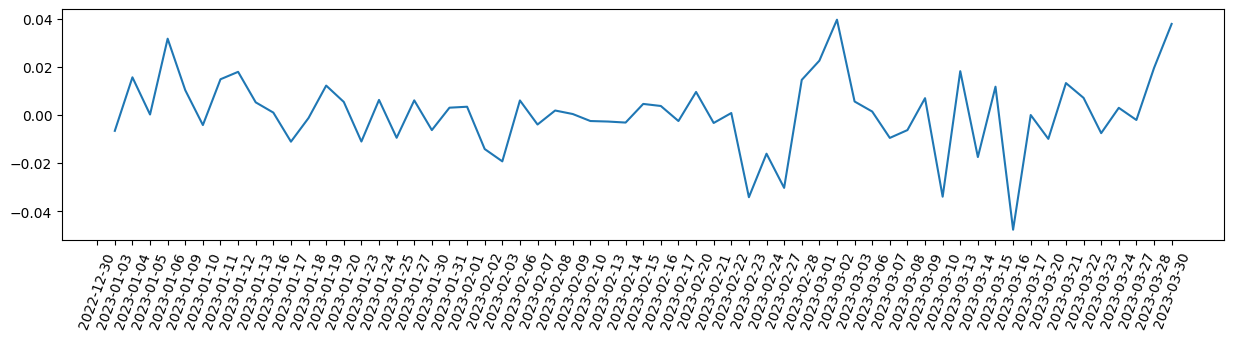

In [37]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.plot(data['Date'], data['daily_return'])
locs, labels = plt.xticks(rotation=70)

## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

Sources:

*Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

*Tony Gaddis, Starting out with Python, 5th Edition*

*Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition*
